In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from tqdm import tqdm

from rbm import FineRBM, A1_RBM
from utils.loss import *

In [2]:
device = torch.device('cuda')

# MLRG Step

In [8]:
def step(J, iters=10000, batch_n=8, k=8):
    fine = FineRBM(J, device)
    coarse = A1_RBM(J, device)
    optimizer = torch.optim.Adam(coarse.parameters(), lr=0.001)

    Js = []
    for i in tqdm(range(iters)):
        optimizer.zero_grad()
    
        loss = free_energy_difference(
            fine, coarse, 
            batch_n=batch_n, k=k
        )
        loss.backward()
        optimizer.step()

        Js.append(float(coarse.J))

    return Js

# MLRG Loop

In [ ]:
J = 1 # Initial J
steps = []

In [12]:
n_steps = 4

for i in range(n_steps):
    print(f'Step {i}')
    
    Js = step(J)
    steps.append(Js)
    
    J = Js[-1]

Step 0


100%|████████████████████████████████████| 10000/10000 [00:20<00:00, 482.04it/s]


Step 1


100%|████████████████████████████████████| 10000/10000 [00:20<00:00, 481.94it/s]


Step 2


100%|████████████████████████████████████| 10000/10000 [00:20<00:00, 489.80it/s]


Step 3


100%|████████████████████████████████████| 10000/10000 [00:20<00:00, 491.09it/s]


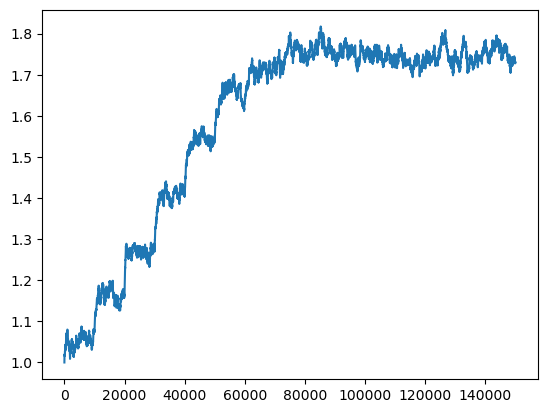

In [13]:
import itertools

plt.plot(list(
    itertools.chain(*steps)
))